# 1 Import libraries

In [1]:
#Installer une bibliothèque externe
!pip install -U imbalanced-learn

import os                  # Gère les opérations système (dossiers, fichiers)
import shutil              # Manipule les fichiers/dossiers (copier, supprimer, déplacer)
import pathlib             # Fournit une interface orientée objet pour gérer les chemins
import PIL                 # Bibliothèque pour le traitement d’image (Pillow)
import cv2                 # OpenCV, traitement d’image avancé (extraction, détection, etc.)
import time                # Mesurer la durée d'exécution ou créer des délais

import numpy as np         # Calcul scientifique, manipulation de tableaux (vecteurs, matrices)
import pandas as pd        # Manipulation de données tabulaires (DataFrames)
import matplotlib.pyplot as plt  # Tracer des graphiques de base
import seaborn as sns             # Visualisation statistique plus avancée que matplotlib
sns.set_style('whitegrid')       # Style graphique pour seaborn : fond blanc quadrillé
import random              # Générer des nombres aléatoires (tirages, shuffling, etc.)
import itertools           # Fournit des fonctions pour manipuler des itérateurs (produit cartésien, permutations, etc.)

# Charge TensorFlow et son API Keras intégrée, utilisée pour construire et entraîner des réseaux de neurones.
import tensorflow as tf
from tensorflow import keras

# Génére automatiquement des lots d’images avec prétraitement et data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importe un modèle pré-entraîné EfficientNetB3, performant pour la classification d’images.
from tensorflow.keras.applications import EfficientNetB3

# Créer des modèles à structure flexible (API fonctionnelle)
from tensorflow.keras import Model

# Empiler les couches linéairement
from tensorflow.keras.models import Sequential

# Conv2D : convolution 2D
# MaxPooling2D : sous-échantillonnage
# Dropout : régularisation
# Flatten, Dense : couches fully connected
# BatchNormalization : stabilise l'entraînement
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten, Dense, Activation

# Adam, Adamax : algorithmes d’optimisation
from tensorflow .keras.optimizers import Adam, Adamax

# Categorical_crossentropy : fonction de perte pour classification multi-classes
from tensorflow.keras.metrics import categorical_crossentropy

# regularizers : pénalise les poids pour éviter l’overfitting
from tensorflow.keras import regularizers

# EarlyStopping : stoppe l'entraînement si validation stagne
# ModelCheckpoint : sauvegarde automatique du meilleur modèle
# ReduceLROnPlateau : réduit le taux d’apprentissage si perte ne baisse plus
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Ignorer les fichiers image corrompus ou inconnus
from PIL import Image, UnidentifiedImageError

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Ignore les warnings
import warnings
warnings.filterwarnings("ignore")

# Cache les logs d’information de TensorFlow
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)


print("All done")

All done


# 2 Read Data

## A- convert files to lists

In [2]:
Path_data = 'diabetic-retinopathy-dataset'
data = os.listdir(Path_data)
Healthy = os.listdir('diabetic-retinopathy-dataset/Healthy')
Mild = os.listdir('diabetic-retinopathy-dataset/Mild DR')
Moderate = os.listdir('diabetic-retinopathy-dataset/Moderate DR')
Proliferate = os.listdir('diabetic-retinopathy-dataset/Proliferate DR')
Severe = os.listdir('diabetic-retinopathy-dataset/Severe DR')

In [3]:
print("classes names :", (data), "\n______________________________\n")
print("Number of classes :", len(data), "\n______________________________\n")
print("Number of Healty images :", len(Healthy), "\n______________________________\n")
print("Number of Mild images :", len(Mild),  "\n______________________________\n")
print("Number of Moderate images :", len(Moderate),  "\n______________________________\n")
print("Number of Proliferate images :", len(Proliferate),  "\n______________________________\n")
print("Number of severe images :", len(Severe),  "\n______________________________\n")

classes names : ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR'] 
______________________________

Number of classes : 5 
______________________________

Number of Healty images : 400 
______________________________

Number of Mild images : 200 
______________________________

Number of Moderate images : 400 
______________________________

Number of Proliferate images : 195 
______________________________

Number of severe images : 150 
______________________________



### As noticed above: data  imbalanced

## B- Create a dataframe

In [4]:
# Get Paths

Path_data = 'diabetic-retinopathy-dataset'

# Create two lists to store paths of images and their labels

imgpaths = []
labels =[]


# Convert directory to list

data = os.listdir(Path_data)

# Get paths and Labels of classes and images in data 

for i in data:
    classpath = os.path.join(Path_data, i)
    imglist = os.listdir(classpath)
    
    for img in imglist:
        imgpath = os.path.join(classpath, img)
        
        imgpaths.append(imgpath)
        labels.append(i)


# Convert two lists of imgpaths and their labels into series

Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')

# Concatenate them in one Dataframe called Tr_data

Df= pd.concat([Paths, Labels], axis = 1)
Df.head(5)

,Paths,Labels
0,diabetic-retinopathy-dataset\Healthy\.ipynb_ch...,Healthy
1,diabetic-retinopathy-dataset\Healthy\Healthy.png,Healthy
2,diabetic-retinopathy-dataset\Healthy\Healthy_1...,Healthy
3,diabetic-retinopathy-dataset\Healthy\Healthy_1...,Healthy
4,diabetic-retinopathy-dataset\Healthy\Healthy_1...,Healthy



### Diabetic retinopathy is a complication of diabetes and a leading cause of blindness. It occurs when diabetes damages the tiny blood vessels inside the retina, the light-sensitive tissue at the back of the eye. A healthy retina is necessary for good vision.
If you have diabetic retinopathy, at first you may notice no changes to your vision. But over time, diabetic retinopathy can get worse and cause vision loss. Diabetic retinopathy usually affects both eyes.

### Diabetic Retinopathy has four stages:

## Mild Nonproliferative Retinopathy
At this earliest stage, microaneurysms occur. They are small areas of balloon-like swelling in the retina’s tiny blood vessels.

## Moderate Nonproliferative Retinopathy
As the disease progresses, some blood vessels that nourish the retina are blocked.

## Severe Nonproliferative Retinopathy
Many more blood vessels are blocked, depriving several areas of the retina with their blood supply. These areas of the retina send signals to the body to grow new blood vessels for nourishment.

## Proliferative Retinopathy
At this advanced stage, the signals sent by the retina for nourishment trigger the growth of new blood vessels. These new blood vessels are abnormal and fragile. They grow along the retina and along the surface of the clear, vitreous gel that fills the inside of the eye.

By themselves, these blood vessels do not cause symptoms or vision loss. However, they have thin, fragile walls. If they leak blood, severe vision loss and even blindness can result.

ref: https://petroueyecare.com/services/medical-eye-exams/diabetic-retinopathy/



# 3 Data Preptocessing

### Oversampling techniques for classification problems

#### 1 Random oversampling
Random Oversampling involves supplementing the training data with multiple copies of some of the minority classes. Oversampling can be done more than once (2x, 3x, 5x, 10x, etc.) This is one of the earliest proposed methods, that is also proven to be robust.[3] Instead of duplicating every sample in the minority class, some of them may be randomly chosen with replacement.

#### 2 Augmentation
Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model.[8] (See: Data augmentation)

ref: https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis#Oversampling_techniques_for_classification_problems

## A- Random Over sampling

more preferred with text data not with images

In [5]:
X= Df.drop(['Labels'], axis = 1)
y = Df['Labels']
y.value_counts()

Labels
Healthy           400
Moderate DR       400
Mild DR           200
Proliferate DR    195
Severe DR         150
Name: count, dtype: int64

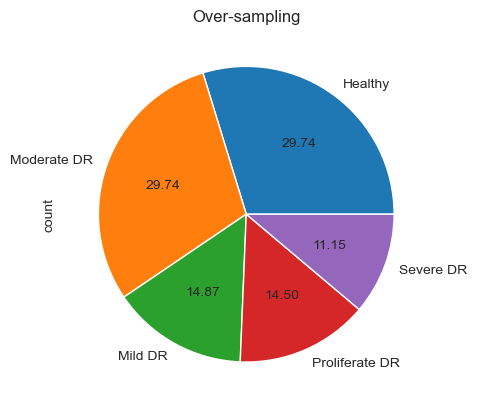

In [6]:
from imblearn.over_sampling import RandomOverSampler

# Define sampling strategy for multi-class
sampling_strategy = {
    'Healthy': 400,
    'Mild DR': 200,
    'Moderate DR': 400,
    'Proliferate DR': 195,
    'Severe DR': 150
}

# Initialize RandomOverSampler with dictionary strategy
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)

# Resample the data
x_ros, y_ros = ros.fit_resample(X, y)

# Plot class distribution after oversampling
ax = y_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title('Over-sampling')
plt.show()

## B- Split data into train, valid, test

In [7]:
#train, valid  and test dataframes
train, testval = train_test_split(Df, test_size = 0.2, shuffle = True, random_state = 40)
valid, test = train_test_split(testval, test_size = 0.5, shuffle = True, random_state = 40)

print("Train shape: ", train.shape)
print("Valid shape: ", valid.shape)
print("Test shape: ", test.shape)

train.Labels.value_counts()

Train shape:  (1076, 2)
Valid shape:  (134, 2)
Test shape:  (135, 2)


Labels
Healthy           319
Moderate DR       309
Mild DR           163
Proliferate DR    157
Severe DR         128
Name: count, dtype: int64

In [8]:
# Split data with stratification
#train, testval = train_test_split(Df, test_size=0.25, shuffle=True, random_state=42, stratify=Df['Labels'])
#valid, test = train_test_split(testval, test_size=0.4, shuffle=True, random_state=42, stratify=testval['Labels'])
train, testval = train_test_split(Df, test_size=0.2, stratify=Df['Labels'], random_state=42)
valid, test = train_test_split(testval, test_size=0.5, stratify=testval['Labels'], random_state=42)

# Print shapes and class distributions
print("Train shape:", train.shape)
print("Valid shape:", valid.shape)
print("Test shape:", test.shape)
print("\nTrain class distribution:\n", train['Labels'].value_counts())
print("\nValid class distribution:\n", valid['Labels'].value_counts())
print("\nTest class distribution:\n", test['Labels'].value_counts())

Train shape: (1076, 2)
Valid shape: (134, 2)
Test shape: (135, 2)

Train class distribution:
 Labels
Moderate DR       320
Healthy           320
Mild DR           160
Proliferate DR    156
Severe DR         120
Name: count, dtype: int64

Valid class distribution:
 Labels
Healthy           40
Moderate DR       40
Mild DR           20
Proliferate DR    19
Severe DR         15
Name: count, dtype: int64

Test class distribution:
 Labels
Moderate DR       40
Healthy           40
Mild DR           20
Proliferate DR    20
Severe DR         15
Name: count, dtype: int64


## C- Data Augmentation

In [9]:
# Define batch size and image dimensions
batch_size = 32 
img_size = (256, 256) # standard value (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_G = ImageDataGenerator(
    rotation_range=60,           
    width_shift_range=0.2,       
    height_shift_range=0.2,      
    shear_range=0.25,            
    zoom_range=0.3,              
    horizontal_flip=True,
    vertical_flip=True,          
    brightness_range=[0.7, 1.3],
    fill_mode='nearest'
)

# Validation generator
V_G = ImageDataGenerator(
    rescale=1./255,
)

t_G = ImageDataGenerator(
    rescale=1./255,
)

# Generate data flows from DataFrames for model training
Train = tr_G.flow_from_dataframe(
    train,  # Training DataFrame with 'Paths' and 'Labels' columns
    x_col='Paths',  # Column with image file paths
    y_col='Labels',  # Column with class labels
    target_size=img_size,  # Resize images to 224x224
    class_mode='categorical',  # One-hot encoded labels for multi-class classification
    color_mode='rgb',  # Load images in RGB format
    shuffle=True,  # Shuffle batches for better training
    batch_size=batch_size  # Number of images per batch
)

# Generate data flow for validation
Valid = V_G.flow_from_dataframe(
    valid,  # Validation DataFrame
    x_col='Paths',
    y_col='Labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,  # Shuffle for consistent validation
    batch_size=batch_size
)

# Generate data flow for testing (no shuffling to maintain order for evaluation)
Test = t_G.flow_from_dataframe(
    test,  # Test DataFrame
    x_col='Paths',
    y_col='Labels',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False,  # No shuffling to preserve order for metrics like confusion matrix
    batch_size=batch_size
)

Found 1075 validated image filenames belonging to 5 classes.
Found 134 validated image filenames belonging to 5 classes.
Found 135 validated image filenames belonging to 5 classes.


## D- Represent a sample

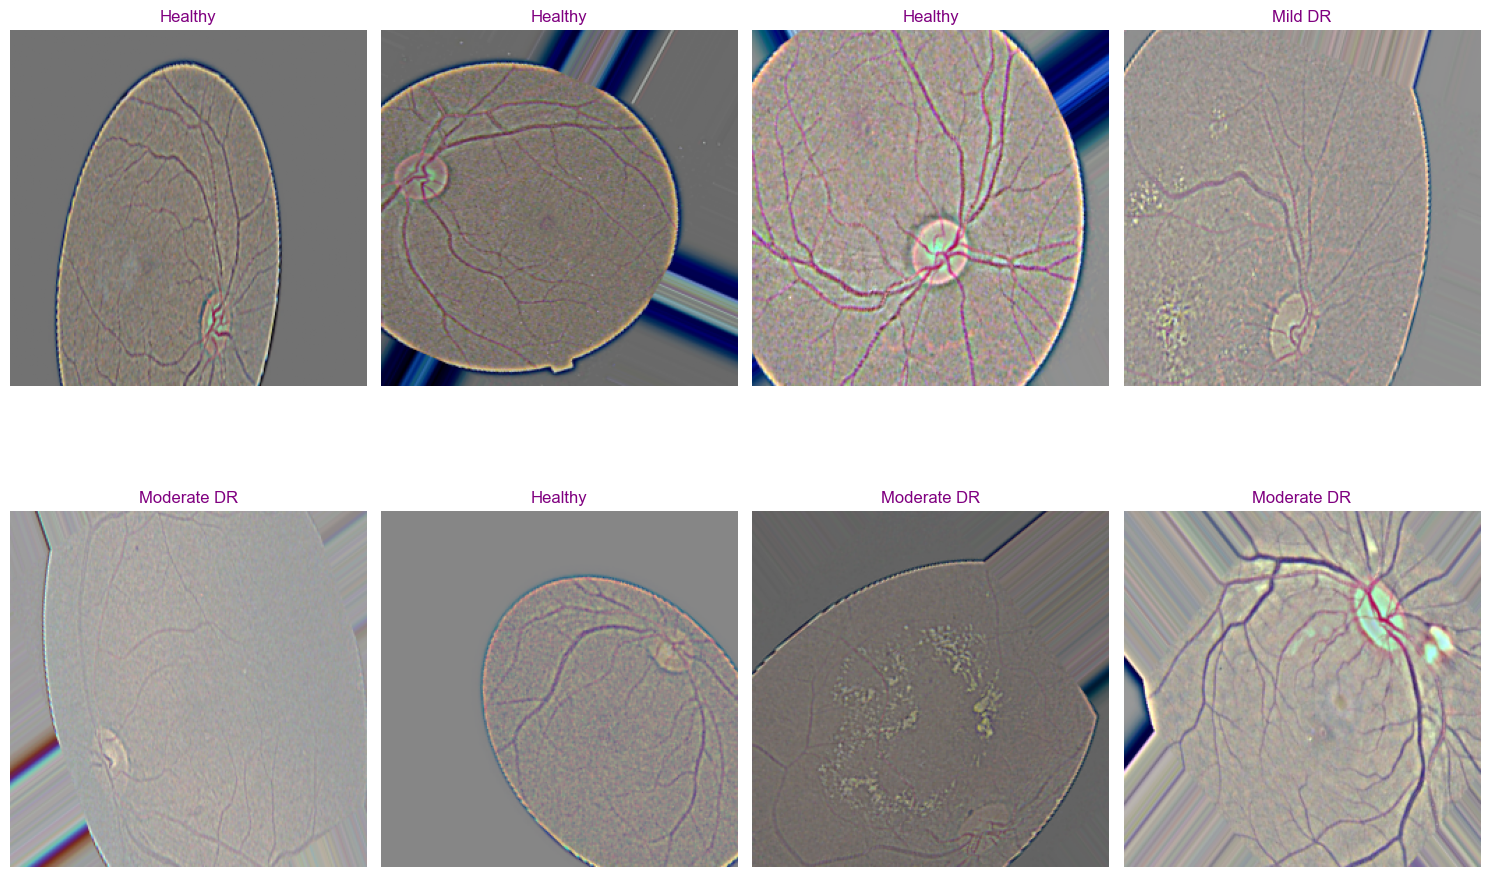

In [10]:
# Define labels and their indices as a dict
L_index = Train.class_indices
L_index

# Store Labels in a list
Keys = list(L_index.keys())
Keys

#Get a sample batch
imgs, labels = next(Train)

# Visualization
plt.figure(figsize= (15, 15))

for i in range(8):
    plt.subplot(3, 4, i +1)
    im = imgs[i]/255
    plt.imshow(im)
    
    #Labelling
    index = np.argmax(labels[i])
    label = Keys[index]
    plt.title(label, color = 'purple')
    plt.axis('off')
    
plt.tight_layout()    
plt.show()

# 4 Modelling

## A- Create a model using transfer learning with EfficientNetB2


#### * NOTE "experts advise you make the base model initially not trainable. Then train for some number of epochs
#### then fine tune model by making base model trainable and run more epochs
#### It was found to be WRONG!!!! 
#### Making the base model trainable from the outset leads to faster convegence and a lower validation loss
#### for the same number of total epochs!"
as mentioned at: https://www.kaggle.com/code/devanshajmera/chair



#### --> I will be using EfficientNetB3 model with weights from imagenet.
##### And I will using include_top=False option since it allows me to add my own output layer.



In [11]:
# Define number of classes 
n_classes = len(list(Train.class_indices.keys()))
print("Nombre de Classes: ", n_classes)

img_shape=(img_size[0], img_size[1], 3)
model_name='EfficientNetB3'
base_model= EfficientNetB3(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 

# Note you are always told NOT to make the base model trainable initially- that is WRONG you get better results leaving it trainable
base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1, momentum=0.999, epsilon=0.001 )(x)

# Construire les couches personnalisées
x = base_model.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dense(512, kernel_regularizer=regularizers.l2(0.01), activation='elu')(x) 
x = Dropout(rate=0.5)(x)
x = Dense(256, kernel_regularizer=regularizers.l2(0.01), activation='elu')(x)
x = Dropout(rate=0.5)(x)
output = Dense(n_classes, activation='softmax')(x)

#Création du modèle
model=Model(inputs=base_model.input, outputs=output)
lr=0.0005

Nombre de Classes:  5


In [12]:
# Créer un modèle séquentiel
model = Sequential()

# Ajouter le modèle de base EfficientNetB3 (gelé initialement pour éviter le surapprentissage)
model.add(base_model)  
# base_model défini comme EfficientNetB3(include_top=False, weights="imagenet", input_shape=(224, 224, 3), pooling='max')

# Ajouter Dropout pour réduire le surapprentissage
model.add(Dropout(0.4))  # Augmenté de 0.3 à 0.4 pour petit dataset

# Ajouter des couches Dense avec régularisation et moins de neurones
model.add(Dense(256, activation='elu', kernel_regularizer=regularizers.l2(0.005)))
model.add(Dropout(0.3))  # Ajouté pour réduire le surapprentissage
model.add(Dense(128, activation='elu', kernel_regularizer=regularizers.l2(0.005)))
model.add(Dropout(0.4))  # Ajouté pour renforcer la régularisation
model.add(Dense(5, activation='softmax'))  # Couche finale pour 5 classes

In [13]:
# Compiler le modèle
model.compile(
    Adam(learning_rate=0.0006), #Utilisation l'optimiseur Adam avec un taux d'apprentissage de 0.001
    loss='categorical_crossentropy',  # Conservé pour la classification multi-classe
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]  # Ajout de l’AUC pour un suivi robuste
)

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)          │ (None, 1536)                │      10,783,535 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1536)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,210,548 (42.76 MB)

 Trainable params: 11,123,245 (42.43 MB)

 Non-trainable params: 87,303 (341.03 KB)

## B- Visualize model layers

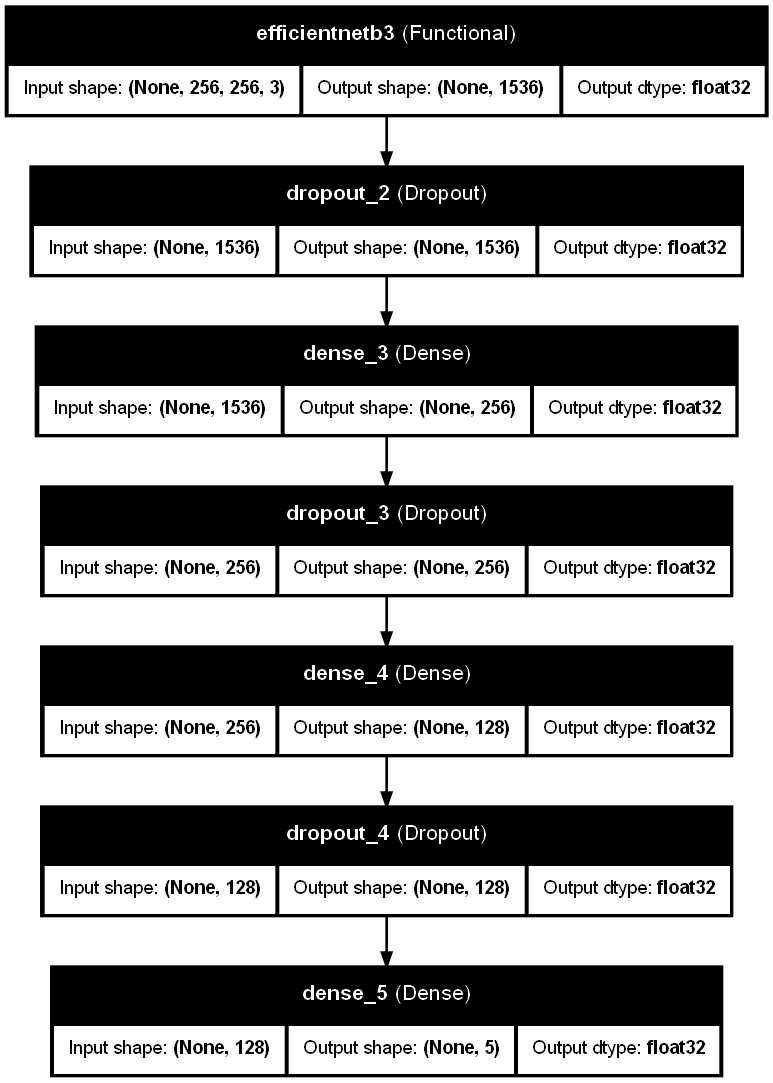

In [15]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

# Générer et sauvegarder le diagramme de l’architecture du modèle
plot_model(
    model,
    to_file='convnet.png',
    show_shapes=True,  # Afficher les formes des tenseurs
    show_layer_names=True,  # Afficher les noms des couches
    show_dtype=True,  # Ajouter les types de données pour plus de clarté
    dpi=96,  # Augmenter la résolution pour une meilleure lisibilité
    rankdir='TB'  # Orientation verticale pour un diagramme plus clair
)

# Afficher l’image avec une taille optimisée
display(Image(filename='convnet.png', width=800))  # Limiter la largeur pour un affichage clair

## C- Training phase

# Définir le nombre d'époques
epochs = 2

# Entraîner le modèle
history = model.fit(
    x=Train,
    epochs=epochs,
    verbose=1,
    validation_data=Valid,
    validation_steps=None,
    shuffle=True  # Maintenu pour la généralisation
)

In [16]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
]

history = model.fit(
    x=Train,
    epochs=30,  # Augmentez à 30 époques
    callbacks=callbacks,
    validation_data=Valid
)

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 395s 10s/step - accuracy: 0.3024 - auc: 0.6012 - loss: 8.6517 - val_accuracy: 0.2985 - val_auc: 0.6116 - val_loss: 4.5807 - learning_rate: 6.0000e-04
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 284s 8s/step - accuracy: 0.4384 - auc: 0.7469 - loss: 4.7880 - val_accuracy: 0.2985 - val_auc: 0.5577 - val_loss: 4.6295 - learning_rate: 6.0000e-04
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 293s 9s/step - accuracy: 0.4656 - auc: 0.7849 - loss: 4.4439 - val_accuracy: 0.2985 - val_auc: 0.5371 - val_loss: 4.5405 - learning_rate: 6.0000e-04
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 289s 9s/step - accuracy: 0.5187 - auc: 0.8184 - loss: 4.1678 - val_accuracy: 0.2985 - val_auc: 0.5027 - val_loss: 4.5416 - learning_rate: 6.0000e-04
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 305s 9s/step - accuracy: 0.5485 - auc: 0.8394 - loss: 4.0132 - val_accuracy: 0.1418 - val_auc: 0.5136 - val_loss: 4.3929 - learning_rate: 6.0000e-04
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 299s 9s/step - accuracy: 0

## D- Evaluation 

In [17]:
# accuracy and loss of Train
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']


# accuracy and loss or Valid\
v_acc = history.history['val_accuracy']
v_loss = history.history['val_loss']


# highest value of v_acc by getting its index
index_acc = np.argmax(v_acc)
high_Vacc = v_acc[index_acc]


# lowest value of v_loss by getting index
index_loss = np.argmin(v_loss)
low_Vloss = v_loss[index_loss]


# n. of epochs based on length of tr_acc values
Epochs =[]
for i in range(len(tr_acc)):
    Epochs.append (i+1)

    
# Define best epoch
best_acc = f'Best epoch ={str(index_acc +1)}'
best_loss = f'Best epoch ={str(index_loss+1)}'

## E- Let's Visualize it

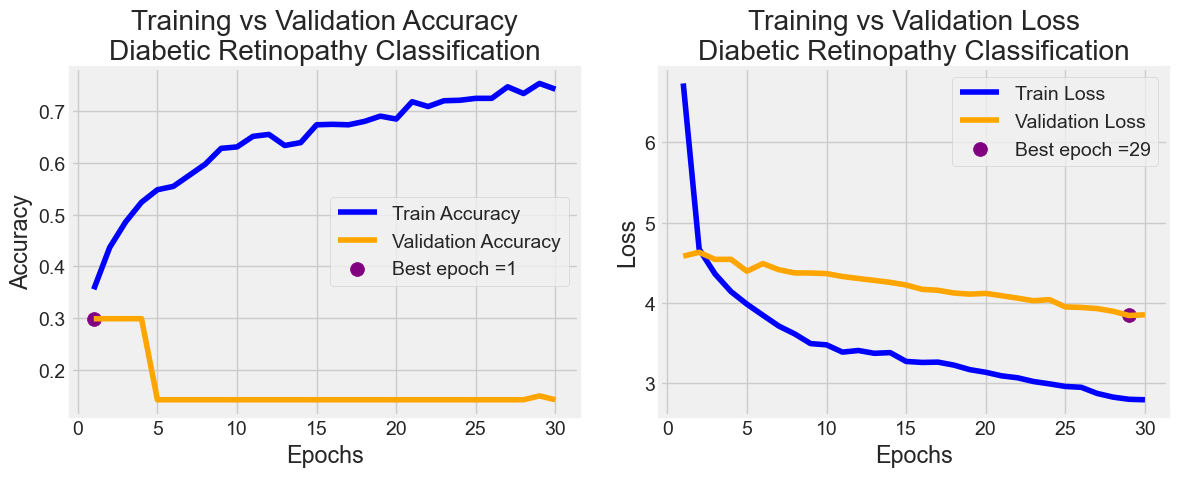

In [18]:
# Créer une figure avec une taille plus compacte
plt.figure(figsize=(12, 5))  # Réduit de (16, 8) à (12, 5) pour une meilleure lisibilité
plt.style.use('fivethirtyeight')  # Changé à 'seaborn' pour un style professionnel

# Sous-graphique pour la précision
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_acc, 'b', label='Train Accuracy')  # Couleur bleu pour l'entraînement
plt.plot(Epochs, v_acc, 'orange', label='Validation Accuracy')  # Couleur orange pour la validation
plt.scatter(index_acc + 1, high_Vacc, s=100, color='purple', label=best_acc)  # Taille réduite à 100
plt.title('Training vs Validation Accuracy\nDiabetic Retinopathy Classification')  # Titre plus spécifique
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Sous-graphique pour la perte
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_loss, 'b', label='Train Loss')  # Couleur bleu
plt.plot(Epochs, v_loss, 'orange', label='Validation Loss')  # Couleur orange
plt.scatter(index_loss + 1, low_Vloss, s=100, color='purple', label=best_loss)  # Taille réduite à 100
plt.title('Training vs Validation Loss\nDiabetic Retinopathy Classification')  # Titre plus spécifique
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Ajuster l'espacement et afficher
plt.tight_layout()
plt.show()

In [19]:
# Define Vars
Train_sc = model.evaluate(Train, verbose = 1)
Valid_sc = model.evaluate(Valid, verbose = 1)
Test_sc =model.evaluate(Test, verbose = 1)

#Print
print('Train Scores : \n    accuracy:', Train_sc[1], '\n      Loss: ', Train_sc[0],'\n      AUC: ', Train_sc[2], '\n________________________')
print('Valid Scores : \n    accuracy:', Valid_sc[1], '\n      Loss: ', Valid_sc[0],'\n      AUC: ', Train_sc[2], '\n________________________')
print('Test Scores : \n    accuracy:', Test_sc[1], '\n      Loss: ', Test_sc[0],'\n      AUC: ', Train_sc[2], '\n________________________')

34/34 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8049 - auc: 0.9637 - loss: 2.6884
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 936ms/step - accuracy: 0.1635 - auc: 0.4952 - loss: 3.8248
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.1431 - auc: 0.4543 - loss: 3.8697
Train Scores : 
    accuracy: 0.800000011920929 
      Loss:  2.68935489654541 
      AUC:  0.9632318615913391 
________________________
Valid Scores : 
    accuracy: 0.1492537260055542 
      Loss:  3.840986967086792 
      AUC:  0.9632318615913391 
________________________
Test Scores : 
    accuracy: 0.14814814925193787 
      Loss:  3.83835768699646 
      AUC:  0.9632318615913391 
________________________


# 5 Get  predictions

In [20]:
predictions = model.predict(Test)
y_pred = np.argmax(predictions, axis = 1)

#Chack
print(predictions)
print(y_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step
[[0.15560843 0.28876755 0.17920385 0.26610988 0.11031035]
 [0.15540098 0.28870326 0.17934676 0.266255   0.11029398]
 [0.15535283 0.2886214  0.17929041 0.26635396 0.11038146]
 [0.15550318 0.2889014  0.17943244 0.2660352  0.11012777]
 [0.15534414 0.28878978 0.17941484 0.26621145 0.11023986]
 [0.15538403 0.28865921 0.17931648 0.26628956 0.11035066]
 [0.15540785 0.28865856 0.17937078 0.26627576 0.11028702]
 [0.15537015 0.2886663  0.17936821 0.266295   0.11030041]
 [0.15554698 0.28902784 0.17925216 0.2660603  0.11011268]
 [0.15550345 0.28880635 0.17941883 0.26609135 0.11017999]
 [0.15561329 0.2890102  0.17923073 0.2660438  0.11010194]
 [0.15536197 0.28864893 0.17936908 0.2662585  0.11036148]
 [0.15559609 0.2890133  0.17923172 0.26603758 0.11012133]
 [0.15537475 0.28871265 0.179315   0.2662634  0.1103343 ]
 [0.15550587 0.28878254 0.1793476  0.26613992 0.11022415]
 [0.15536815 0.28864676 0.1793627  0.26632708 0.11029539]
 [0.15534846 0.2887525  0.17925215 

In [21]:
# Use n. of keys of  Class indices to create confusion matrix
Test_cl_ind = Test.class_indices
 
# Get Keys
classes = list(Test_cl_ind.keys())

#CM
cm = confusion_matrix(Test.classes, y_pred)
cm

array([[ 0, 40,  0,  0,  0],
       [ 0, 20,  0,  0,  0],
       [ 0, 40,  0,  0,  0],
       [ 0, 20,  0,  0,  0],
       [ 0, 15,  0,  0,  0]], dtype=int64)

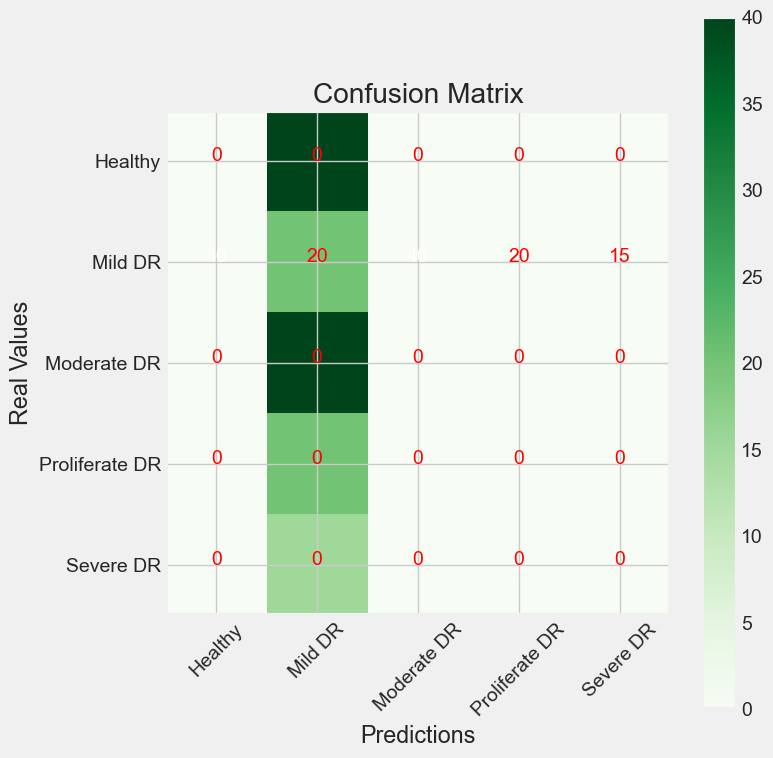

In [22]:
#visualise it
plt.figure(figsize =(8, 8))
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,rotation = 45)
plt.yticks(tick_marks, classes)

thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(i, j, cm[i, j], horizontalalignment = 'center', color = 'white' if cm[i,j] > thresh  else 'red')
    
plt.tight_layout()
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()

In [23]:
# Calssification Report
print(classification_report(Test.classes, y_pred, target_names = classes))

                precision    recall  f1-score   support

       Healthy       0.00      0.00      0.00        40
       Mild DR       0.15      1.00      0.26        20
   Moderate DR       0.00      0.00      0.00        40
Proliferate DR       0.00      0.00      0.00        20
     Severe DR       0.00      0.00      0.00        15

      accuracy                           0.15       135
     macro avg       0.03      0.20      0.05       135
  weighted avg       0.02      0.15      0.04       135



# 7 Save model

In [ ]:
model.save('effB3 CNN DR.h5')

In [ ]:
model.save('effB3_CNN_DR.keras')

In [ ]:
#from tensorflow.keras.models import load_model

# Load the .keras model
#model = load_model('effB3_CNN_DR.keras')